code from: https://rasterio.readthedocs.io/en/latest/topics/reading.html

### Merging Raster Imagery

In [4]:
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
import rioxarray as rxr
from matplotlib import pyplot as plt
import pandas as pd



%matplotlib inline


# Data Exploration

### Import the data

In [4]:
#list of test data files
PIREDD_2013 = '/Users/joycelynlongdon/Desktop/Cambridge/CambridgeCoding/MRES/Data/PIREDD_Test_Data/PIREDD_2013_Test_Date_Merged.tif'
PIREDD_2014 = '/Users/joycelynlongdon/Desktop/Cambridge/CambridgeCoding/MRES/Data/PIREDD_Test_Data/PIREDD_2014_Test_Data_Merged.tif'
PIREDD_2015 = '/Users/joycelynlongdon/Desktop/Cambridge/CambridgeCoding/MRES/Data/PIREDD_Test_Data/PIREDD_2015_Test_Data_Merged.tif'
PIREDD_2016 = '/Users/joycelynlongdon/Desktop/Cambridge/CambridgeCoding/MRES/Data/PIREDD_Test_Data/PIREDD_2016_Test_Data_Merged.tif'
PIREDD_2017 = '/Users/joycelynlongdon/Desktop/Cambridge/CambridgeCoding/MRES/Data/PIREDD_Test_Data/PIREDD_2017_Test_Data_Merged.tif'
PIREDD_2018 = '/Users/joycelynlongdon/Desktop/Cambridge/CambridgeCoding/MRES/Data/PIREDD_Test_Data/PIREDD_2018_Test_Data_Merged.tif'
PIREDD_2019 = '/Users/joycelynlongdon/Desktop/Cambridge/CambridgeCoding/MRES/Data/PIREDD_Test_Data/PIREDD_2019_Test_Data_Merged.tif'


#routine to visualise a given year and its bandsfor data in test_data:
src = rasterio.open(PIREDD_2019)
array = src.read()
band_1 = src.read(1)
band_2 = src.read(2)
band_3 = src.read(3)
band_4 = src.read(4)
band_5 = src.read(5)    
band_6 = src.read(6)
band_7 = src.read(7)


### Visualise  the Data

<AxesSubplot:title={'center':'Band 8'}>

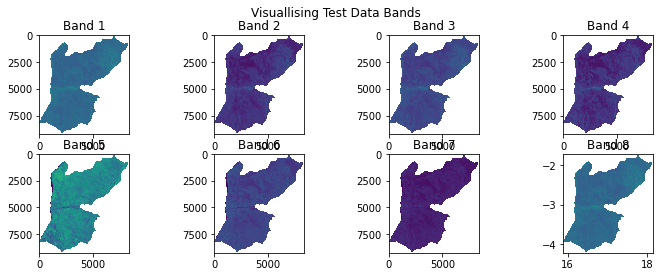

In [4]:
#plot band images
fig, ((ax1, ax2, ax3 , ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4, figsize = (12,4)) 
fig.suptitle('Visuallising Test Data Bands')
ax1.title.set_text('Band 1')
ax2.title.set_text('Band 2')
ax3.title.set_text('Band 3')
ax4.title.set_text('Band 4')
ax5.title.set_text('Band 5')
ax6.title.set_text('Band 6')
ax7.title.set_text('Band 7')
ax8.title.set_text('Band 8')
show(band_1, ax=ax1)
show(band_2, ax=ax2)
show(band_3, ax=ax3)
show(band_4, ax=ax4)
show(band_5, ax=ax5)
show(band_6, ax=ax6)
show(band_7, ax=ax7)
show(src, ax=ax8)


### Read MetaData

In [5]:
# How many bands does this image have?
num_bands = src.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = src.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# What driver was used to open the raster?
driver = src.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = src.crs
print('Image projection:')
print(proj)

Number of bands in image: 7

Image size is: 9242 rows x 8409 columns

Raster driver: GTiff

Image projection:
EPSG:4326


In [6]:
print(array)

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

### Visualise Landcover Data

In [6]:
#import data
ESA_CCI = '/Users/joycelynlongdon/Desktop/Cambridge/CambridgeCoding/MRES/Data/ESA_CCI/CCI_Landcover_Maps/ESA_CCI_LC_Map_2013.tif'
landcover_classes = '/Users/joycelynlongdon/Desktop/Cambridge/CambridgeCoding/MRES/Data/ESA_CCI/CCI_Landcover_Maps/ESACCI-LC-Legend.csv'
classes = pd.read_csv(landcover_classes, delimiter=";", index_col=0)
LC_src = rasterio.open(ESA_CCI)
LC_array = LC_src.read()



In [8]:
# check out data
print(f"There are {len(classes)} classes.")
print(classes)

There are 38 classes.
                                              LCCOwnLabel    R    G    B
NB_LAB                                                                  
0                                                 No data    0    0    0
10                                      Cropland, rainfed  255  255  100
11                                       Herbaceous cover  255  255  100
12                                    Tree or shrub cover  255  255    0
20                   Cropland, irrigated or post-flooding  170  240  240
30      Mosaic cropland (>50%) / natural vegetation (t...  220  240  100
40      Mosaic natural vegetation (tree, shrub, herbac...  200  200  100
50      Tree cover, broadleaved, evergreen, closed to ...    0  100    0
60      Tree cover, broadleaved, deciduous, closed to ...    0  160    0
61      Tree cover, broadleaved, deciduous, closed (>40%)    0  160    0
62      Tree cover, broadleaved, deciduous, open (15-40%)  170  200    0
70      Tree cover, needlelea